<a href="https://colab.research.google.com/github/AlbertoMartinezS/idal_ia3/blob/main/EJERCICIO_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**El objetivo del ejercicio es:**

- Optimizar arquitectura de la red

- Partir training en training + validación usando como ejemplo lo que se hacía en el notebook de las caras (carpeta 03-caras)

- Sacar heatmaps

In [1]:
COLAB = True

In [2]:
if COLAB:
    #%tensorflow_version 1.x
    !pip install h5py==2.10.0

TensorFlow 1.x selected.


Si se desea ejecutar en local:

- Descargar el dataset de training de: https://drive.google.com/file/d/1ChJn1h340ECm1uezE-oLr6TwCbeGglvQ

- Y el de test de: https://drive.google.com/file/d/1STokCqelhLeiwlTa2YX-TM9SNCx74-an

- Poner variable COLAB a False

In [3]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model, Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from glob import glob

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import SVG, display, clear_output
from keras.utils.vis_utils import model_to_dot

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

%matplotlib inline

Using TensorFlow backend.


In [4]:
!ls -la

total 253672
drwxr-xr-x 1 root root      4096 Dec 11 10:56 .
drwxr-xr-x 1 root root      4096 Dec 11 10:54 ..
drwxr-xr-x 4 root root      4096 Dec  3 14:33 .config
drwxr-xr-x 4 root root      4096 Dec 11 10:56 __MACOSX
drwxr-xr-x 1 root root      4096 Dec  3 14:33 sample_data
drwxr-xr-x 8 root root      4096 Dec 11 10:56 seg_test
-rw-r--r-- 1 root root  45638665 Dec 11 10:56 seg_test.zip
drwxr-xr-x 8 root root      4096 Dec 11 10:56 seg_train
-rw-r--r-- 1 root root 214084517 Dec 11 10:56 seg_train.zip


In [5]:
if COLAB:
    from google_drive_downloader import GoogleDriveDownloader as gdd
    gdd.download_file_from_google_drive(file_id='1ChJn1h340ECm1uezE-oLr6TwCbeGglvQ',
                                        dest_path='./seg_train.zip', unzip=True)
    gdd.download_file_from_google_drive(file_id='1STokCqelhLeiwlTa2YX-TM9SNCx74-an',
                                        dest_path='./seg_test.zip', unzip=True)
    

In [6]:
!ls -la

total 253672
drwxr-xr-x 1 root root      4096 Dec 11 10:56 .
drwxr-xr-x 1 root root      4096 Dec 11 10:54 ..
drwxr-xr-x 4 root root      4096 Dec  3 14:33 .config
drwxr-xr-x 4 root root      4096 Dec 11 10:56 __MACOSX
drwxr-xr-x 1 root root      4096 Dec  3 14:33 sample_data
drwxr-xr-x 8 root root      4096 Dec 11 10:56 seg_test
-rw-r--r-- 1 root root  45638665 Dec 11 10:56 seg_test.zip
drwxr-xr-x 8 root root      4096 Dec 11 10:56 seg_train
-rw-r--r-- 1 root root 214084517 Dec 11 10:56 seg_train.zip


In [7]:
!ls seg_train

buildings  forest  glacier  mountain  sea  street


In [8]:
!ls seg_test

buildings  forest  glacier  mountain  sea  street


In [9]:
!ls seg_train/buildings

0.jpg	   12578.jpg  14916.jpg  17468.jpg  20017.jpg  4600.jpg  7382.jpg
10006.jpg  12590.jpg  14918.jpg  17479.jpg  20027.jpg  4620.jpg  7383.jpg
10014.jpg  125.jpg    14947.jpg  17480.jpg  2002.jpg   4621.jpg  739.jpg
10018.jpg  12602.jpg  14952.jpg  17491.jpg  20048.jpg  4623.jpg  7418.jpg
1001.jpg   12615.jpg  14958.jpg  17495.jpg  20054.jpg  4630.jpg  742.jpg
10029.jpg  12617.jpg  14968.jpg  17503.jpg  2038.jpg   4631.jpg  7439.jpg
10032.jpg  12629.jpg  14984.jpg  17516.jpg  2041.jpg   4634.jpg  7443.jpg
10056.jpg  12632.jpg  14991.jpg  1751.jpg   2043.jpg   463.jpg	 7455.jpg
1009.jpg   12636.jpg  1501.jpg	 17520.jpg  2059.jpg   4667.jpg  7463.jpg
10113.jpg  1263.jpg   15026.jpg  17537.jpg  2069.jpg   4686.jpg  7471.jpg
10126.jpg  12649.jpg  15030.jpg  17539.jpg  2076.jpg   4715.jpg  7478.jpg
1012.jpg   12659.jpg  1503.jpg	 1753.jpg   2083.jpg   4748.jpg  747.jpg
10144.jpg  12668.jpg  15042.jpg  17541.jpg  2088.jpg   4770.jpg  7491.jpg
10151.jpg  12669.jpg  15045.jpg  17545.jpg  20

In [10]:
ficheros = glob("./seg_train/forest/*")
ficheros[0]

'./seg_train/forest/1844.jpg'

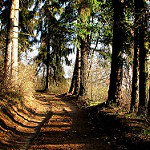

In [11]:
imagen = load_img(ficheros[4])
imagen

In [12]:
imagen.size

(150, 150)

In [13]:
#partir training en training y validacion

In [14]:
clases= ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

rutas_trval= []
clases_trval= []


for clase in clases:
  rutas_aux = glob("./seg_train/forest/*".format(clase))
  clases_aux = len(rutas_aux)*[clase]
  print(rutas_aux[:3])
  print(clases_aux[:3])


  rutas_trval.extend(rutas_aux)
  clases_trval.extend(clases_aux)

['./seg_train/forest/1844.jpg', './seg_train/forest/11724.jpg', './seg_train/forest/2699.jpg']
['buildings', 'buildings', 'buildings']
['./seg_train/forest/1844.jpg', './seg_train/forest/11724.jpg', './seg_train/forest/2699.jpg']
['forest', 'forest', 'forest']
['./seg_train/forest/1844.jpg', './seg_train/forest/11724.jpg', './seg_train/forest/2699.jpg']
['glacier', 'glacier', 'glacier']
['./seg_train/forest/1844.jpg', './seg_train/forest/11724.jpg', './seg_train/forest/2699.jpg']
['mountain', 'mountain', 'mountain']
['./seg_train/forest/1844.jpg', './seg_train/forest/11724.jpg', './seg_train/forest/2699.jpg']
['sea', 'sea', 'sea']
['./seg_train/forest/1844.jpg', './seg_train/forest/11724.jpg', './seg_train/forest/2699.jpg']
['street', 'street', 'street']


In [15]:
import pandas as pd


df_trval= pd.DataFrame({'ruta':rutas_trval, 'clase':clases_trval})
df_trval

,ruta,clase
0,./seg_train/forest/1844.jpg,buildings
1,./seg_train/forest/11724.jpg,buildings
2,./seg_train/forest/2699.jpg,buildings
3,./seg_train/forest/12016.jpg,buildings
4,./seg_train/forest/13880.jpg,buildings
...,...,...
13621,./seg_train/forest/7955.jpg,street
13622,./seg_train/forest/1096.jpg,street
13623,./seg_train/forest/19072.jpg,street
13624,./seg_train/forest/2457.jpg,street


In [16]:
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(df_trval, train_size= 0.5, random_state=1, stratify=df_trval["clase"])

In [17]:
df_train['clase'].value_counts() / len(df_train)*100

forest       16.674006
sea          16.674006
glacier      16.674006
buildings    16.659328
mountain     16.659328
street       16.659328
Name: clase, dtype: float64

In [18]:
df_val['clase'].value_counts() / len(df_train)*100

buildings    16.674006
mountain     16.674006
street       16.674006
forest       16.659328
sea          16.659328
glacier      16.659328
Name: clase, dtype: float64

In [33]:
#train_data_dir = 'seg_train'
#validation_data_dir = 'seg_test'
test_data_dir = 'seg_test'

batch_size = 128

Para ver opciones:

https://keras.io/api/preprocessing/image/#imagedatagenerator-class


In [20]:

# data augmentation:

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='mirror', # 'nearest',
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

In [21]:
imagen_num = np.array([img_to_array(imagen)])

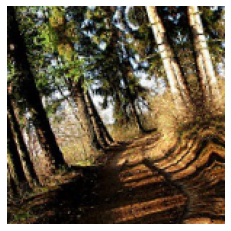

In [22]:
plt.imshow(train_datagen.flow(imagen_num)[0][0])
plt.axis("off");

In [23]:
# dimensiones a las que vamos a llevar las imágenes
img_width, img_height = 75, 75

normed_dims = (img_height, img_width)

In [24]:
normed_dims

(75, 75)

In [25]:
# sparse_categorical_crossentropy

#building: 0
# 1,0,0,0,0,0

# forest': 1
# 0,1,0,0,0,0

# glacier: 2
# 0,0,1,0,0,0

# mountain: 3
# 0,0,0,1,0,0

# sea: 4,
# 0,0,0,0,1,0

# street: 5
# 0,0,0,0,0,1

In [34]:
# Definir arquitectura del modelo:

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu',
                 input_shape=normed_dims+(3,)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
# aqui empieza la red neuronal 'standard'
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu', kernel_regularizer="l2")) # regularizador L2
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))




model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)             

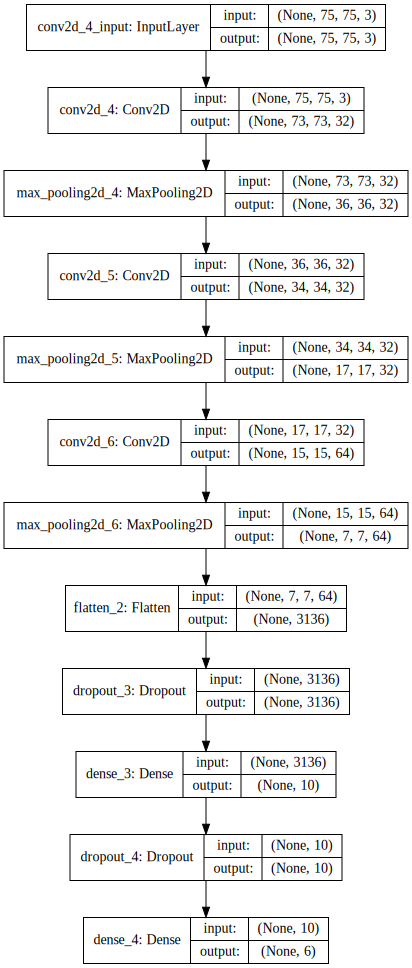

In [36]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

if COLAB:
    display(SVG(model_to_dot(model, show_shapes=True,dpi=72).create(prog='dot', format='svg')))
else:
    display(SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg')))

In [37]:
def preprocess_input(x):
    return x/255

In [38]:
train_datagen = ImageDataGenerator(
    dtype='float32',
    preprocessing_function = preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen  = ImageDataGenerator(dtype='float32',
                                  preprocessing_function = preprocess_input)

test_datagen = ImageDataGenerator(dtype='float32',
                                  preprocessing_function = preprocess_input)

In [31]:
#validation_data_dir, normed_dims

In [39]:
train_generator = train_datagen.flow_from_dataframe(
    df_train,
    x_col = 'ruta',
    y_col = 'clase',
    target_size=normed_dims,
    batch_size=batch_size,
    shuffle=True,
    class_mode='sparse')

validation_generator = val_datagen.flow_from_dataframe(
    df_val,
    x_col = 'ruta',
    y_col = 'clase',
    target_size=normed_dims,
    batch_size=batch_size,
    shuffle=False,
    class_mode='sparse')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=normed_dims,
    batch_size=batch_size,
    shuffle=False,
    class_mode='sparse')

Found 6813 validated image filenames belonging to 6 classes.
Found 6813 validated image filenames belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [40]:
test_datagen.flow_from_dataframe

<bound method ImageDataGenerator.flow_from_dataframe of <keras.preprocessing.image.ImageDataGenerator object at 0x7fc2392b0210>>

In [41]:
train_generator.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [42]:
number_train_samples = train_generator.n
number_val_samples   = validation_generator.n
number_test_samples  = test_generator.n

number_train_samples, number_val_samples, number_test_samples

(6813, 6813, 3000)

In [43]:
from matplotlib.ticker import MaxNLocator

def grafica_entrenamiento(tr_acc, val_acc, tr_loss, val_loss, best_i,
                          figsize=(10,4)):
    plt.figure(figsize=figsize)
    ax = plt.subplot(1,2,1)
    plt.plot(1+np.arange(len(tr_acc)),  100*np.array(tr_acc))
    plt.plot(1+np.arange(len(val_acc)), 100*np.array(val_acc))
    plt.plot(1+best_i, 100*val_acc[best_i], 'or')
    plt.title('tasa de acierto del modelo (%)', fontsize=18)
    plt.ylabel('tasa de acierto (%)', fontsize=18)
    plt.xlabel('época', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.subplot(1,2,2)
    plt.plot(1+np.arange(len(tr_acc)), np.array(tr_loss))
    plt.plot(1+np.arange(len(val_acc)), np.array(val_loss))
    plt.plot(1+best_i, val_loss[best_i], 'or')
    plt.title('loss del modelo', fontsize=18)
    plt.ylabel('loss', fontsize=18)
    plt.xlabel('época', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

In [44]:
acum_tr_acc = []
acum_val_acc = []
best_val_acc = -1000
acum_tr_loss  = []
acum_val_loss = []

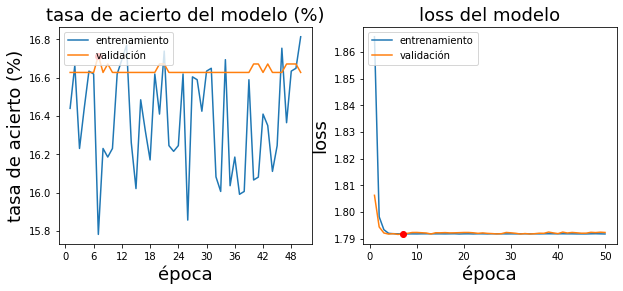

In [45]:
epochs = 50

modelpath="best_model.h5"

checkpoint = ModelCheckpoint(modelpath, monitor='val_accuracy', verbose=1,
                              save_best_only=True,
                              mode='max') # graba sólo los que mejoran en validación
callbacks_list = [checkpoint]
for e in range(epochs):
    history = model.fit_generator(generator = train_generator, 
                                  steps_per_epoch=number_train_samples // batch_size,
                                  epochs=1,
                                  callbacks=callbacks_list,
                                  verbose=1,
                                  shuffle = True,
                                  validation_data=validation_generator,
                                  validation_steps=number_val_samples // batch_size
                                  )
    
    if history.history['val_accuracy'][-1] > best_val_acc:
        print("Validation accuracy improved from",
            best_val_acc, 'to', history.history['val_accuracy'])
        print("saving weights")
        best_val_acc = history.history['val_accuracy'][-1]
    
    acum_tr_acc.append(history.history['accuracy'][0])
    acum_val_acc.append(history.history['val_accuracy'][0])
    acum_tr_loss.append(history.history['loss'][0])
    acum_val_loss.append(history.history['val_loss'][0])
    
    if len(acum_tr_acc) > 1:
        clear_output()
        best_i = np.argmax(acum_val_acc)
        grafica_entrenamiento(acum_tr_acc, acum_val_acc, acum_tr_loss, acum_val_loss, best_i)

In [46]:
!ls -la

total 254424
drwxr-xr-x 1 root root      4096 Dec 11 11:07 .
drwxr-xr-x 1 root root      4096 Dec 11 10:54 ..
-rw-r--r-- 1 root root    769728 Dec 11 11:09 best_model.h5
drwxr-xr-x 4 root root      4096 Dec  3 14:33 .config
drwxr-xr-x 4 root root      4096 Dec 11 10:56 __MACOSX
drwxr-xr-x 1 root root      4096 Dec  3 14:33 sample_data
drwxr-xr-x 8 root root      4096 Dec 11 10:56 seg_test
-rw-r--r-- 1 root root  45638665 Dec 11 10:56 seg_test.zip
drwxr-xr-x 8 root root      4096 Dec 11 10:56 seg_train
-rw-r--r-- 1 root root 214084517 Dec 11 10:56 seg_train.zip


In [47]:
model = load_model(modelpath)

## **Resultados obtenidos**

In [48]:
scores_tr = model.evaluate(train_generator)
print('Train loss    :', scores_tr[0])
print('Train accuracy:', scores_tr[1])
print()

scores_val = model.evaluate(validation_generator)
print('Val loss    :', scores_val[0])
print('Val accuracy:', scores_val[1])
print()

scores_te = model.evaluate(test_generator)
print('Test loss     :', scores_te[0])
print('Test accuracy :', scores_te[1])

54/54 [==============================] - 18s 335ms/step
Train loss    : 1.7907766103744507
Train accuracy: 0.1665932834148407

54/54 [==============================] - 7s 125ms/step
Val loss    : 1.7913397550582886
Val accuracy: 0.1667400598526001

24/24 [==============================] - 3s 122ms/step
Test loss     : 1.79368257522583
Test accuracy : 0.17499999701976776


In [49]:
y_real = test_generator.classes
y_pred_proba = model.predict_generator(test_generator)

In [51]:
y_real[:5]

array([0, 0, 0, 0, 0], dtype=int32)

In [52]:
y_pred_proba[:5]

array([[0.16688326, 0.16563623, 0.16696082, 0.16726345, 0.16690937,
        0.16634686],
       [0.16688326, 0.16563623, 0.16696082, 0.16726345, 0.16690937,
        0.16634686],
       [0.16688326, 0.16563623, 0.16696082, 0.16726345, 0.16690937,
        0.16634686],
       [0.16688326, 0.16563623, 0.16696082, 0.16726345, 0.16690937,
        0.16634686],
       [0.16688326, 0.16563623, 0.16696082, 0.16726345, 0.16690937,
        0.16634686]], dtype=float32)

In [54]:
test_generator.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [53]:
num2class = {test_generator.class_indices[x]:x  for x in test_generator.class_indices.keys()}
num2class

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

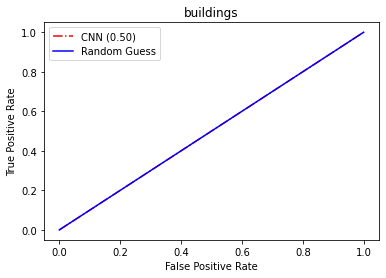

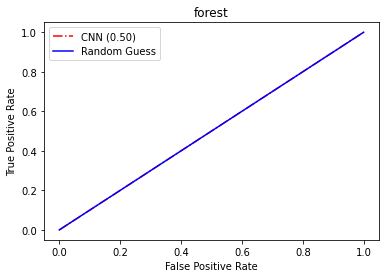

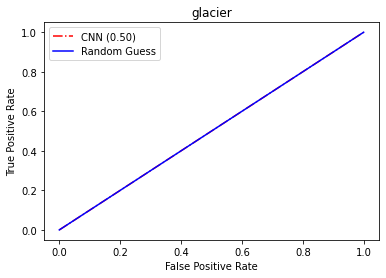

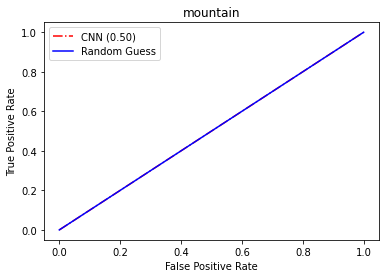

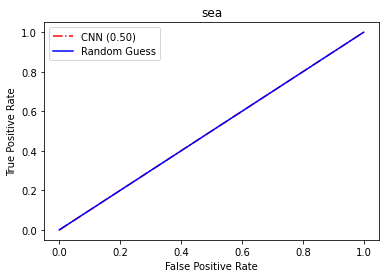

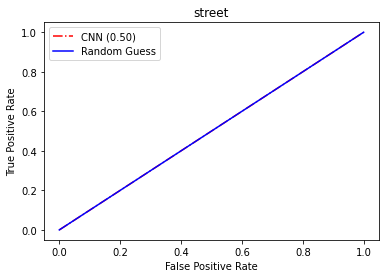

In [55]:
for clase in range(6):
    nombre_clase = num2class[clase]

    fpr, tpr, thresholds = roc_curve(y_real==clase, y_pred_proba[:,clase])
    fig, ax1 = plt.subplots(1,1)
    ax1.plot(fpr, tpr, 'r-.', label = 'CNN (%2.2f)' % auc(fpr, tpr))
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.plot(fpr, fpr, 'b-', label = 'Random Guess')
    ax1.set_title(nombre_clase)
    ax1.legend()
    plt.show()

## **Visualización de ejemplos de test**

In [56]:
test_datagen2 = ImageDataGenerator(dtype='float32')

test_generator2 = test_datagen2.flow_from_directory(
    test_data_dir,
    target_size=normed_dims,
    batch_size=test_generator.n,
    shuffle=False,
    class_mode='sparse')

Found 3000 images belonging to 6 classes.


In [57]:
test_generator2.reset()
X_te, y_te = test_generator2.next()

In [58]:
test_generator2.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [59]:
y_te

array([0., 0., 0., ..., 5., 5., 5.], dtype=float32)

Clase real: buildings
buildings: 16% forest: 16% glacier: 16% mountain: 16% sea: 16% street: 16% 


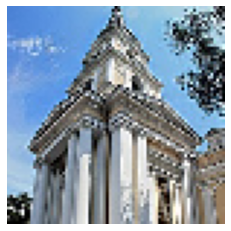

In [63]:
ind_te1 = 140

image = X_te[ind_te1].copy()

print("Clase real:", num2class[y_te[ind_te1]])
plt.imshow(image/255, cmap='jet')
plt.axis("off")
p = model.predict(preprocess_input(np.array([image])))[0]
cadena = ""
for i in range(len(num2class)):
    cadena = cadena + "{}: {}% ".format(num2class[i], int(100*p[i]))
print(cadena)

In [61]:
!ls

best_model.h5  sample_data  seg_test.zip  seg_train.zip
__MACOSX       seg_test     seg_train


In [ ]:
# Para descargar el modelo a local:

#from google.colab import files
#files.download('./best_model.h5')

### HEATMAPS

In [68]:
test_datagen2 = ImageDataGenerator(dtype='float32',
                                   preprocessing_function = preprocess_input)

test_generator2 = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=normed_dims,
    batch_size=test_generator.n, # todas las imágenes del directorio test
    shuffle=False,
    class_mode='sparse') # binary: 0/1. Sparse: entero a partir de 0. Categorical: one hot

Found 3000 images belonging to 6 classes.


In [69]:
test_generator2.reset()
X_te, y_te = test_generator2.next()

In [72]:
X_te.shape

(3000, 75, 75, 3)

In [73]:
import tensorflow as tf

def find_ind_last_conv2D(model):
    ind_last_conv2D_layer = None
    for i,x in enumerate(model.layers):
        if x.__class__.__name__ == "Conv2D":
            ind_last_conv2D_layer = i
    return ind_last_conv2D_layer


def show_heatmap(model, im):
    imag = np.expand_dims(im, axis=0) # de 1 imagen pasamos a 1 conjunto de 1 imagen
        
    # The is the output feature map of the last convolutional layer
    last_conv_layer = model.layers[find_ind_last_conv2D(model)]
    
    # This is the gradient of the "benign" class with regard to
    # the output feature map of last convolutional layer
    with tf.GradientTape() as tape:
        aux = model.output
        #aux = model.layers[-2].output # salida de la última capa densa antes de softmax

        iterate = tf.keras.models.Model([model.inputs], [aux, last_conv_layer.output])
        model_out, last_conv_layer = iterate(imag)
        class_out = model_out[:, np.argmax(model_out[0])]
        grads = tape.gradient(class_out, last_conv_layer)

        # mean intensity of the gradient over a specific feature map channel:
        pooled_grads = K.mean(grads, axis=(0, 1, 2))
    
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)    
    heatmap = np.maximum(heatmap, 0) # se quitan los negativos (se ponen a 0)
    heatmap /= np.max(heatmap) # se normaliza entre 0 y 1
    heatmap = heatmap[0] # pasamos de 1 conjunto de 1 heatmap a 1 heatmap
    
    # We use cv2 to load the original image
    #img = cv2.imread(img_path)
    img = imag[0]
    
    img = np.zeros((im.shape[0],im.shape[1],3))
#    print(im.shape, imag.shape)
    for i in range(3):
        img[:,:,i] = imag[0,:,:,0]

    
    # We resize the heatmap to have the same size as the original image
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    
    # We convert the heatmap to RGB
    heatmap = np.uint8(255 * heatmap)
    
    # We apply the heatmap to the original image
    #heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET) / 255
    #heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_BONE) / 255
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_HOT) / 255
    
    
    # 0.4 here is a heatmap intensity factor
    superimposed_img = heatmap * 0.5 + 0.5*im
    #print(heatmap.min(), heatmap.max(), heatmap.mean(), heatmap.std())
    #print(img.min(), img.max(), img.mean(), img.std())
    #print(superimposed_img.min(),  superimposed_img.max(),
    #      superimposed_img.mean(), superimposed_img.std())
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.imshow(im, vmin=0, vmax=1); plt.xticks([]); plt.yticks([])
    plt.subplot(1,3,2)
    plt.imshow(heatmap, vmin=0, vmax=1); plt.xticks([]); plt.yticks([])
    plt.subplot(1,3,3)
    plt.imshow(superimposed_img, vmin=0, vmax=1); plt.xticks([]); plt.yticks([])
    plt.show()
    #print(np.shape(imag))
    #prob = 100*model.predict(imag)[0][class_indices["female"]]
    #print("Probabilidad clase female: {:2.1f}%".format(prob))
    #prob = 100*model.predict(imag)[0][class_indices["male"]]
    #print("Probabilidad clase male  : {:2.1f}%".format(prob))
    print("\n\n")
    return heatmap, superimposed_img

In [71]:
ind = 1041 # visualizamos 10 ejemplos de test a partir de este (en test hay 2002 ejemplos)
#ind = 200

for i in range(ind, ind+10):
    show_heatmap(model, X_te[i])

AttributeError: ignored